In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report

####
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB

In [2]:
# Load test and train data sets
test_df = pd.read_csv("static/test.csv")
train_df = pd.read_csv("static/train.csv")

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Column definitions
# survival:    Survival 
# PassengerId: Unique Id of a passenger. 
# pclass:    Ticket class     
# sex:    Sex     
# Age:    Age in years     
# sibsp:    # of siblings / spouses aboard the Titanic     
# parch:    # of parents / children aboard the Titanic     
# ticket:    Ticket number     
# fare:    Passenger fare     
# cabin:    Cabin number     
# embarked:    Port of Embarkation

In [6]:
#Save PassengerId for later analysis
test_data_passengerid = test_df["PassengerId"]

# Removing following columns, as unnecessary for our analysis:
# sipsp
# parch
# ticket
# fare
# cabin
# name
test_data_clean = test_df.drop(['Name','PassengerId','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
test_data_clean.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


In [7]:
train_data_clean = train_df.drop(['Name','PassengerId','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
train_data_clean.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [8]:
train_data_clean.to_csv(r'static/training_data_clean.csv')

In [9]:
test_data_clean.to_csv(r'static/test_data_clean.csv')

In [10]:
test_df = test_data_clean
print(test_df.shape)

(418, 4)


In [11]:
train_df = train_data_clean
print(train_df.shape)

(891, 5)


In [12]:
test_df

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,NaN,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,NaN,S


In [12]:
train_df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [13]:
train_df.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [14]:
# Convert Sex to an integer (female=0, male=1)
train_df["Sex"] = train_df["Sex"].replace(["female"],0)
train_df["Sex"] = train_df["Sex"].replace(["male"],1)
train_df["Sex"] = train_df["Sex"].astype(int)

#Convert ports to numbers
#C = Cherbourg, Q = Queenstown, S = Southampton
train_df["Embarked"] = train_df["Embarked"].replace(["C"],1)
train_df["Embarked"] = train_df["Embarked"].replace(["Q"],2)
train_df["Embarked"] = train_df["Embarked"].replace(["S"],3)

#Convert NaN values to 85
#Used 85, since our max age was 80, to put these into their own bucket
train_df["Age"] = train_df["Age"].fillna(85)

train_df["Age"].value_counts(dropna=False)

85.00    177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [50]:
# Convert Sex to an integer (female=0, male=1)
test_df["Sex"] = test_df["Sex"].replace(["female"],0)
test_df["Sex"] = test_df["Sex"].replace(["male"],1)
test_df["Sex"] = test_df["Sex"].astype(int)

#Convert ports to numbers
#C = Cherbourg, Q = Queenstown, S = Southampton
test_df["Embarked"] = test_df["Embarked"].replace(["C"],1)
test_df["Embarked"] = test_df["Embarked"].replace(["Q"],2)
test_df["Embarked"] = test_df["Embarked"].replace(["S"],3)

#Convert NaN values to 0
test_df["Age"] = test_df["Age"].fillna(85)

test_df["Age"].value_counts(dropna=False)

85.0    86
24.0    17
21.0    17
22.0    16
30.0    15
        ..
60.5     1
26.5     1
76.0     1
67.0     1
34.5     1
Name: Age, Length: 80, dtype: int64

In [16]:
#Survival by Passenger Class
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
#Survival by Sex
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


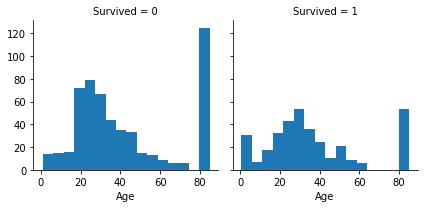

In [18]:
#Survival by Age Group Graph
age = sns.FacetGrid(train_df, col="Survived")
# Chose 16 bins, based on max age=80, gives us a bin for every 5 years
age.map(plt.hist, "Age", bins=16)

plt.show()
# Note the far right age category (85), this is actually all the NaN values

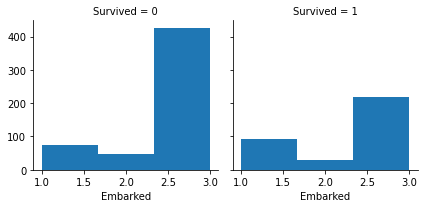

In [19]:
#Survival by Embarking Station Graph
#C = Cherbourg, Q = Queenstown, S = Southampton

embarked = sns.FacetGrid(train_df, col="Survived")
embarked.map(plt.hist, "Embarked", bins=3)

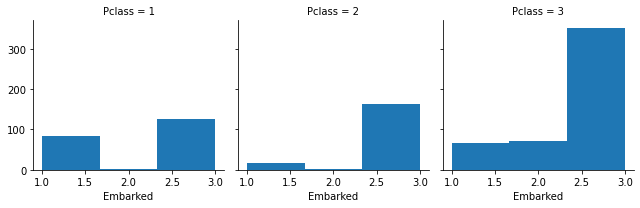

In [20]:
# Plot of Embarked vs Class
embarked_class = sns.FacetGrid(train_df, col="Pclass")
embarked_class.map(plt.hist, "Embarked", bins=3)

In [22]:
#Let's do a survivability train on passenger class
X = train_df[["Pclass"]]
y = train_df[["Survived"]]
print(X.shape, y.shape)

(891, 1) (891, 1)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.2044203382201094
R-squared (R2 ): 0.14760867018716872


In [27]:
model.score(X_test, y_test)

0.14760867018716872

In [28]:
#Let's do a survivability train on passenger's age (we'll drop any NaN ages)
train_age_df = train_df.dropna()
X = train_age_df[["Age"]]
y = train_age_df[["Survived"]]
print(X.shape, y.shape)

(889, 1) (889, 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.22815210553133647
R-squared (R2 ): 0.018701257916638347


In [32]:
model.score(X_test, y_test)

0.018701257916638347

In [33]:
#Let's do a survivability train on passenger's sex
X = train_df[["Sex"]]
y = train_df[["Survived"]]
print(X.shape, y.shape)

(891, 1) (891, 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.16774668370246174
R-squared (R2 ): 0.30053036778134135


In [37]:
#KNeighbors classifier
train_df = train_df.dropna()
y=train_df["Survived"]
target_names = ["yes","no"]

X = train_df.drop("Survived", axis=1)
X.head

<bound method NDFrame.head of      Pclass  Sex   Age  Embarked
0         3    1  22.0       3.0
1         1    0  38.0       1.0
2         3    0  26.0       3.0
3         1    0  35.0       3.0
4         3    1  35.0       3.0
..      ...  ...   ...       ...
886       2    1  27.0       3.0
887       1    0  19.0       3.0
888       3    0  85.0       3.0
889       1    1  26.0       1.0
890       3    1  32.0       2.0

[889 rows x 4 columns]>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [40]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.889/0.830
k: 3, Train/Test Score: 0.860/0.825
k: 5, Train/Test Score: 0.851/0.821
k: 7, Train/Test Score: 0.836/0.807
k: 9, Train/Test Score: 0.832/0.821
k: 11, Train/Test Score: 0.818/0.825
k: 13, Train/Test Score: 0.811/0.812
k: 15, Train/Test Score: 0.805/0.798
k: 17, Train/Test Score: 0.811/0.807
k: 19, Train/Test Score: 0.814/0.798


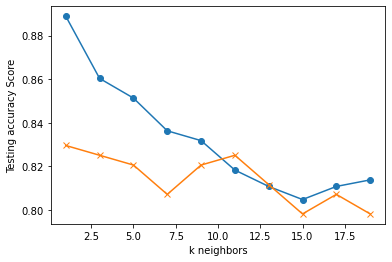

In [41]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
# Note that k = 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.821


In [43]:
# SVM linear classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.789


In [45]:
# Calculate classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         yes       0.84      0.82      0.83       141
          no       0.71      0.73      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [47]:
test_df

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
...,...,...,...,...
413,3,male,NaN,S
414,1,female,39.0,C
415,3,male,38.5,S
416,3,male,NaN,S


In [51]:
# KNN predictor running against test_df
X_train = train_df.drop(["Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()

knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [54]:
# Make an array from test_df.passengerid
# merge this and Y_pred into DF, save to csv file
len(Y_pred)
len(test_data_passengerid)

418

In [55]:
survival_df = pd.DataFrame({"PassengerId": test_data_passengerid, "Survived": Y_pred}, columns=["PassengerId","Survived"])

In [56]:
survival_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
survival_df.to_csv(r'static/test_data_survival.csv')